#### A closer look at the data

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

To begin, let's read in the data and necessary libraries.

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from collections import defaultdict

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Number of rows and columns in the dataset

In [168]:
n_rows, n_cols = df.shape
print('Number of rows: ', n_rows)
print('Number of columns: ', n_cols)

Number of rows:  19102
Number of columns:  154


2. List of columns with no missing values

In [169]:
list(df.columns[df.isnull().mean() == 0])

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation']

3. Columns with most missing values, over 90% of missing values

In [170]:
df.columns[df.isnull().mean() > 0.9]

Index(['YearsCodedJobPast', 'MobileDeveloperType', 'NonDeveloperType',
       'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years',
       'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode',
       'ExCoderActive', 'TimeAfterBootcamp', 'ExpectedSalary'],
      dtype='object')

4. Bar chart of the number of individuals in each status.

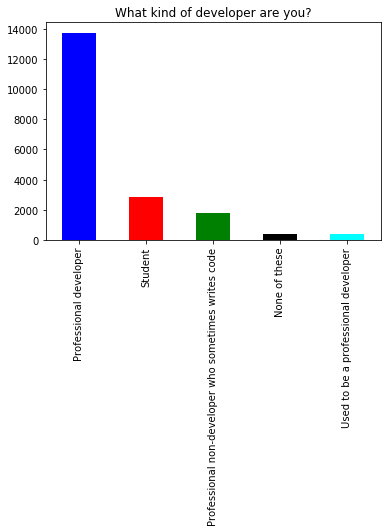

In [172]:
status_vals = df['Professional'].value_counts()
status_vals.plot(kind="bar", color=['blue', 'red', 'green', 'black', 'cyan']);
plt.title("What kind of developer are you?");

5. Bar chart of the number of individuals for each educational status.

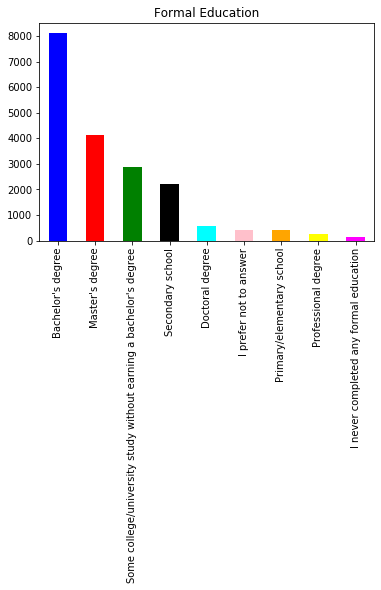

In [173]:
ed_vals = df['FormalEducation'].value_counts()

ed_vals.plot(kind="bar", color=['blue', 'red', 'green', 'black', 'cyan', 'pink', 'orange', 'yellow', 'magenta']);
plt.title("Formal Education");

6. Bar chart of the number of individuals in each of the top 10 countries.

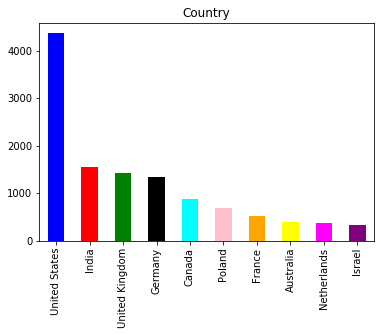

In [174]:
count_vals = df.Country.value_counts()

count_vals[:10].plot(kind="bar", color=['blue', 'red', 'green', 'black', 'cyan', 'pink', 'orange', 'yellow', 'magenta', 'purple']);
plt.title("Country");

In [265]:
pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female')").groupby(['Gender', 'FormalEducation']).mean()['Salary'])

Salary
Gender FormalEducation                                                 
Female Bachelor's degree                                   59901.894205
       Doctoral degree                                     83332.583351
       I prefer not to answer                              20691.397849
       Master's degree                                     51395.305901
       Professional degree                                 67521.095365
       Secondary school                                    38673.862023
       Some college/university study without earning a...  45149.521658
Male   Bachelor's degree                                   59538.372951
       Doctoral degree                                     77120.265378
       I never completed any formal education              43956.636637
       I prefer not to answer                              40850.596080
       Master's degree                                     61632.442196
       Primary/elementary school                           64022.483103
       Professional degree                                 45662.824726
       Secondary school                                    39544.122310
       Some college/university study without earning a...  60420.217368